МНОЖЕСТВЕННЫЙ РЕГРЕССИОННЫЙ АНАЛИЗ
В этом уроке применим линейную регрессию на практике – попробуем предсказать стоимость машин и понять, от каких факторов зависит ценообразование на автомобили. Помимо этого узнаем, какие переменные важны для прогнозирования и насколько хорошо полученная модель описывает данные.

Задания
Загрузите данные, проверьте правильность, наличие пропущенных значений, типы данных.
Создайте новый признак – марку автомобиля (company). Машины каких производителей встречаются в датасете? Далее исправьте названия и проверьте изменения.
Оставьте только часть предикторов, после чего посчитайте корреляцию между price и другими переменными.
Преобразуйте категориальные переменные с помощью pd.get_dummies().
Постройте модель с одним предиктором цены – horsepower. Какой процент изменчивости объясняет полученная модель? (
)
Далее – две модели (со всеми предикторами и со всеми, кроме марок машин). Обратите внимание на изменения в (
), коэффициентах и их значимости. Какую модель лучше оставить?
Заполните пропуски в результатах.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
import matplotlib as mpl
mpl.style.use('ggplot')

1. Загрузите данные, проверьте правильность, наличие пропущенных значений, типы данных.

In [5]:
cars = pd.read_csv('cars.csv')

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
cars.shape

(205, 26)

In [80]:
cars[['price', 'horsepower']]

,price,horsepower
0,13495.0,111
1,16500.0,111
2,16500.0,154
3,13950.0,102
4,17450.0,115
...,...,...
200,16845.0,114
201,19045.0,160
202,21485.0,134
203,22470.0,106


2. Создайте новый признак – марку автомобиля (company). Машины каких производителей встречаются в датасете? Далее исправьте названия и проверьте изменения.

In [11]:
cars.loc[:, 'Company'] = cars.loc[:, 'CarName'].map(lambda x: x.split(' ')[0])
cars['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
cars['Company'] = cars['Company'].replace('maxda', 'mazda')
cars['Company'] = cars['Company'].replace('Nissan', 'nissan')
cars['Company'] = cars['Company'].replace('porcshce', 'porsche')
cars['Company'] = cars['Company'].replace('vokswagen', 'volkswagen')
cars['Company'] = cars['Company'].replace('vw', 'volkswagen')

In [15]:
f'Число уникальных марок машин - {cars['Company'].nunique()}, а чаще всего встречается {cars['Company'].value_counts().keys()[0]}'

'Число уникальных марок машин - 23, а чаще всего встречается toyota'

Корреляционная матрица через интструменты NUMPY - показывает зависомсть количсетвенных переменных каждой друг с другом.
Коэфициент корреляции изменяется в пределах от -1 до 1.

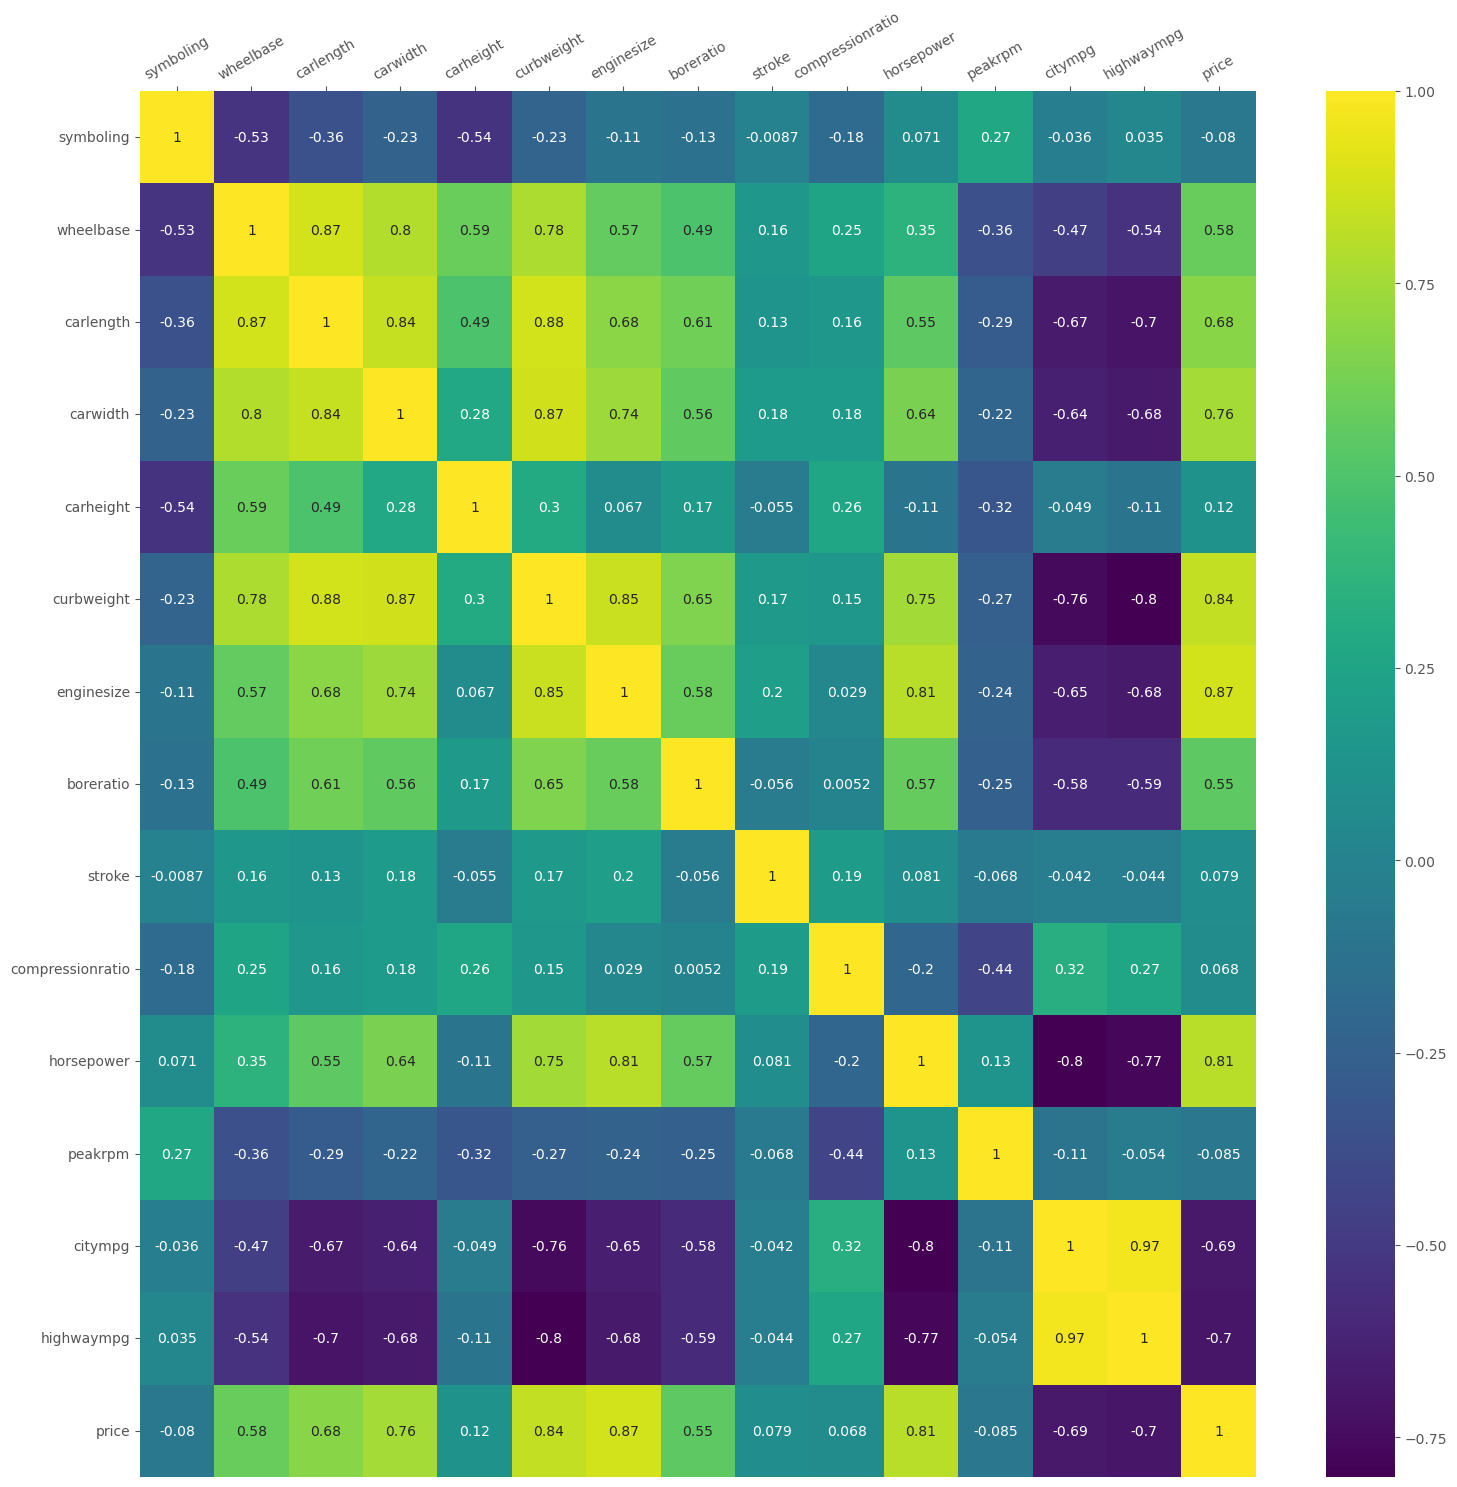

In [17]:
df = cars.select_dtypes(include='number')
df = df.loc[:, ~df.columns.isin(['car_ID'])]
corr_array = np.corrcoef(df.values, rowvar=False)
corr_df = pd.DataFrame(corr_array, index=df.columns, columns=df.columns)

plt.figure(figsize=(18, 18))
ax = sns.heatmap(corr_df, annot=True, cmap='viridis')

ax.xaxis.set_label_position('top')  
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.show()

3. Оставьте только часть предикторов, после чего посчитайте корреляцию между price и другими переменными.

In [19]:
cols_to_keep = ['Company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 
                'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'price']

In [21]:
# Выбрать только столбцы с числовым типом данных  
#numeric_cols = cars.select_dtypes(include='number')
#numeric_cols.columns

In [21]:
cars2 = cars[cols_to_keep]
cars2

,Company,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,16845.0
201,volvo,gas,turbo,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19045.0
202,volvo,gas,std,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,21485.0
203,volvo,diesel,turbo,sedan,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,22470.0


In [23]:
df = cars2.select_dtypes(include = ['int64', 'float64']).corr()
df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,0.835305
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,0.874145
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,0.553173
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,0.808139
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,1.000000


После этого посчитайте корреляцию между price и другими переменными. Чему равна корреляция между price и horsepower? Ответ округлите до 2 знаков после точки.

In [25]:
df['price'].sort_values(ascending=False).round(2)

price         1.00
enginesize    0.87
curbweight    0.84
horsepower    0.81
carwidth      0.76
carlength     0.68
wheelbase     0.58
boreratio     0.55
Name: price, dtype: float64

4. Преобразуйте категориальные переменные с помощью pd.get_dummies().
Последний шаг в подготовке данных: линейная регрессия в python не справляется с категориальными переменными (типом object в pandas), поэтому давайте применим pd.get_dummies().

In [27]:
cars2.shape

(205, 15)

In [29]:
cars2.dtypes

Company            object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
price             float64
dtype: object

In [31]:
dummies = pd.get_dummies(cars2.select_dtypes(include = ['object']) , drop_first=True)
dummies

,Company_audi,Company_bmw,Company_buick,Company_chevrolet,Company_dodge,Company_honda,Company_isuzu,Company_jaguar,Company_mazda,Company_mercury,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [33]:
cars_ = pd.concat([cars.select_dtypes(include = ['int64', 'float64']), dummies], axis=1)
cars_ = cars_.drop(['car_ID', 'symboling'], axis=1)
cars_

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,False,False,True,False,False,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,False,False,True,False,False,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,False,False,True,False,False,False,True,False,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,True,False,False,False,False,True,False,False,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,True,False,False,False,False,True,False,False,False,False
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,True,False,False,False,False,True,False,False,False,False
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,False,False,True,False,False,False,True,False,False,False
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,True,False,False,False,False,False,True,False,False,False


In [35]:
cars_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   carheight              205 non-null    float64
 4   curbweight             205 non-null    int64  
 5   enginesize             205 non-null    int64  
 6   boreratio              205 non-null    float64
 7   stroke                 205 non-null    float64
 8   compressionratio       205 non-null    float64
 9   horsepower             205 non-null    int64  
 10  peakrpm                205 non-null    int64  
 11  citympg                205 non-null    int64  
 12  highwaympg             205 non-null    int64  
 13  price                  205 non-null    float64
 14  Company_audi           205 non-null    bool   
 15  Compan

In [37]:
cars_.loc[:,'Company_audi':'cylindernumber_two'] = cars_.loc[:,'Company_audi':'cylindernumber_two'].apply(lambda x: x.astype('int64'))

C:\Users\tsyto\AppData\Local\Temp\ipykernel_22756\3185606910.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  cars_.loc[:,'Company_audi':'cylindernumber_two'] = cars_.loc[:,'Company_audi':'cylindernumber_two'].apply(lambda x: x.astype('int64'))
C:\Users\tsyto\AppData\Local\Temp\ipykernel_22756\3185606910.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pand

5. Сначала построим небольшую модель всего с одним предиктором цены (price) – horsepower. Какой процент изменчивости объясняет полученная модель? 

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin as pg
from sklearn.linear_model import LinearRegression

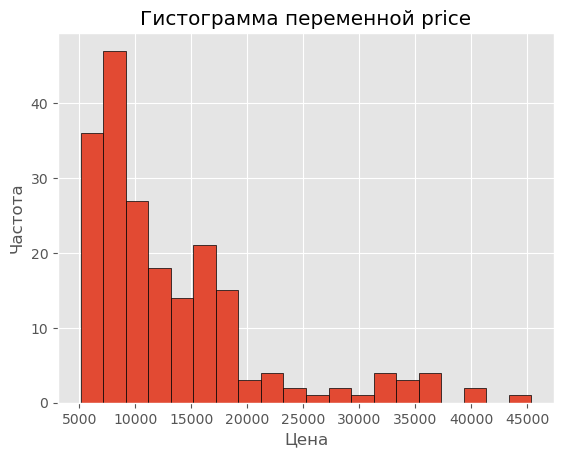

In [40]:
#Линейная регрессия не требует, чтобы зависимая переменная была нормально распределена.
#Главное — чтобы остатки модели были примерно нормально распределены, это будет говориь о качестве нашей модели
plt.hist(cars_['price'], bins=20, edgecolor='black')
plt.title("Гистограмма переменной price")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

Через граФик посмотрим на линейность и монотонность связи. Связь определенно монотонна, а большинство точек лежит в пределах нормы условной от линии, это обычно считается приемлемым. Позже еще сможем взглянуть на коэффициент детерминации (R²): чем ближе к 1, тем лучше.

sns.regplot(x='horsepower', y='price', data=cars_)

In [45]:
print(smf.ols('price ~ horsepower', cars_).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           1.48e-48
Time:                        13:21:22   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

In [ ]:
R-squared	Коэффициент детерминации. Показывает, какую долю вариации цены объясняет модель. Чем выше, тем лучше.
Adj. R-squared	Скорректированный R² с учётом числа предикторов и объёма выборки.
coef  -  Оценки коэффициентов модели: intercept (свободный член) и коэффициент при horsepower.
std err	-  Стандартная ошибка коэффициентов — показывает точность оценки.
Если p-value для horsepower > 0.05 — коэффициент незначим, можно пересмотреть модель.  

Коэффициент horsepower: около 163 — значит, с каждым увеличением horsepower на 1, цена увеличивается примерно на 163.
P>|t| очень маленькое (близко к 0) — оба параметра статистически значимы.
R-squared (0.653): модель объясняет около 65.3% цены.
horsepower — значимый предиктор для price. Модель удачная.

In [ ]:
y = b0 + b1X + e - уравнение регрессии
(b0) (Intercept coef) — свободный член (константа), соответствует колонке Intercept в выводе. Это значение (y), когда (x = 0).
(b1) (horsepower coef) — коэффициент при признаке (например, horsepower), показывает, как изменится (y) при изменении (x) на 1 единицу.
e - ошибки(остатки уравнения регрессии) — это разница между наблюдаемым значением зависимой переменной и значением, предсказанным моделью.

В классической линейной регрессии предполагается, что остатки(отклонения зависимой переменной от линии[остатки — разницы между фактическими значениями зависимой переменной и предсказанными моделью]) распределены нормально. Это влияет на достоверность статистических тестов и доверительных интервалов. Построим гистограмму остатков.

In [49]:
#независимую переменные нужно передать как "2D контейнер"(Из Series в DataFrame[Двумерный Numpy массив])

X = cars_[['horsepower']]
y = np.log(cars_['price'])

model = LinearRegression()
model.fit(X, y)

# Получение предсказанных значений
y_pred = model.predict(X)

#Расчет непосредственно остатков
residuals = y - y_pred

In [70]:
#Среднее остатков должно быть равно нулю, это так же говорит нам окачестве нашей регрессионной модели.
residuals.mean()

-4.679183869639684e-16

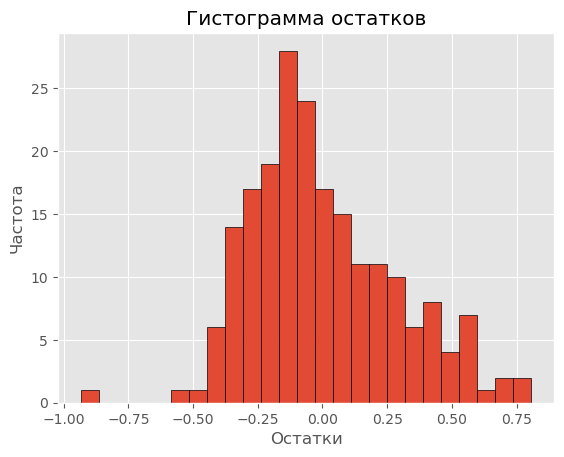

In [53]:
plt.hist(residuals, bins=25, edgecolor='black')
plt.title("Гистограмма остатков")
plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.show()

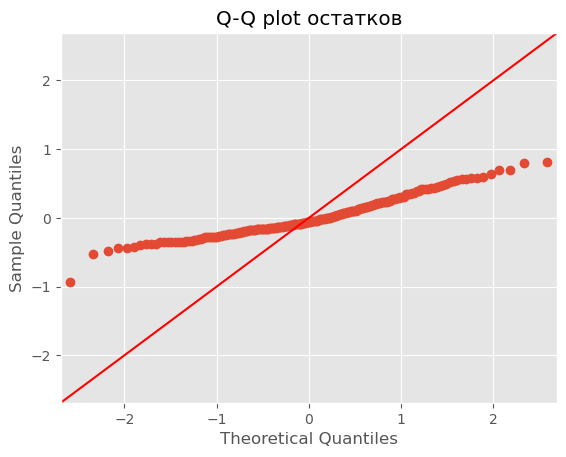

In [76]:
# Q-Q plot для проверки нормальности
sm.qqplot(residuals, line='45')
plt.title('Q-Q plot остатков')
plt.show()

In [55]:
pg.normality(residuals)

,W,pval,normal
price,0.965858,0.000072,False


По-хорошему, мы видим , что наши остатки не совсем нормально распределены, а тест Шапиро-Уилка с большой долей вероятности заявляет о ненормальности распределения. Поэтому правильным дальнейшим шагом было бы трансформация переменной(логарифм,квадрат и прочее) или поиск более подходящего непараметрического регрессионного теста... P.S. Логарифмирование показывает результат лучше, но все равно еще не совсем удовлетворительный.

Omnibus и Jarque-Bera показывают, что ошибки не нормально распределены. Это может влиять на корректность p-value и доверительных интервалов.

Skew > 1 — ошибки имеют сильную асимметрию, а Kurtosis > 5 — ошибки имеют "тяжёлые хвосты", то есть больше выбросов, чем при нормальном распределении
.
Durbin-Watson = 0.792 говорит о сильной автокорреляции ошибок (ошибки зависят друг от друга), что нарушает одно из ключевых предположений регресси
и.
Cond. No. = 314 — есть признаки мультиколлинеарности или проблемы с масштабом признаков, что может влиять на стабильность коэффициентов.

In [61]:
#Всю эту ифнормацию о качестве нашей модели мы можем увидеть в нижней части полученной таблицы корреляции, 
#давайте взглянем еще раз на эти показатели у логарифмированной зависимой переменной price
cars_['log_price'] = np.log(cars_['price'])
print(smf.ols('log_price ~ horsepower', cars_).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     435.4
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           2.12e-52
Time:                        13:40:53   Log-Likelihood:                -32.404
No. Observations:                 205   AIC:                             68.81
Df Residuals:                     203   BIC:                             75.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2592      0.056    147.112      0.0

Важно, чтобы в данных не было нулевых или отрицательных значений цены (т.к. логарифм от них не определён).

Интерпретация коэффициентов: Коэффициенты интерпретируются как процентное изменение цены при изменении horsepower на 1 единицу.
Приращение horsepower на 1 единицу связано с изменением цены примерно на (coef * 100)%. В нашем случае на 1%

In [ ]:
Оценка предположений модели с общими выводами...

Показатель	        Значение	Комментарий
Omnibus	            9.246	Тест на нормальность распределения ошибок — небольшое отклонение от нормальности.

Prob(Omnibus)	    0.010	p-value < 0.05, значит ошибки не полностью нормальны, но ближе к нормальному распределению, чем раньше.
    
Jarque-Bera (JB)	9.243	Аналогично Omnibus — небольшое отклонение от нормальности.
    
Prob(JB)	        0.00984	Малое значение — подтверждает отклонения от нормальности.
    
Skew	            0.506	Мера асимметрии распределения ошибок. Значение > 0 означает скошенность вправо (положительную).
                            Ошибк немного скошены вправо, но меньше, чем в модели с необработанными ценами.
                                
Kurtosis	        3.239	Почти нормальная "тяжесть хвостов" (нормальное распределение — 3).

Durbin-Watson	    0.716	Есть автокорреляция ошибок (значение < 2), стоит проверить временную структуру данных.

Cond. No.	        314	    Признак возможной мультиколлинеарности или проблем с масштабом признаков.


Теперь – две модели:

модель со всеми предикторами
модель со всеми предикторами, кроме марок машин
Обратим внимание на изменения в  коэффициентах и их значимости. Какую модель лучше оставить?
-----
Где меньше предикторов, ведь R2 изменился не очень сильно, а часть марок вообще не значима
-----

In [88]:
x = cars_.drop(['price'], axis='columns')
x = sm.add_constant(x)
y = cars_['price']
print(sm.OLS(y,x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     156.9
Date:                Sun, 29 Jun 2025   Prob (F-statistic):          6.56e-109
Time:                        17:19:18   Log-Likelihood:                -1717.2
No. Observations:                 205   AIC:                             3544.
Df Residuals:                     150   BIC:                             3727.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.17e+

In [90]:
cars__ = cars_[cars_.columns[~cars_.columns.str.startswith('Company')]]


In [92]:
x = cars__.drop(['price'], axis='columns')
x = sm.add_constant(x)
y = cars__['price']
print(sm.OLS(y,x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     211.8
Date:                Sun, 29 Jun 2025   Prob (F-statistic):          9.95e-122
Time:                        17:19:24   Log-Likelihood:                -1749.6
No. Observations:                 205   AIC:                             3567.
Df Residuals:                     171   BIC:                             3680.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.122e+

Выбираем модель где меньше предикторов, ведь R2 изменился не очень сильно, а часть марок вообще не значима.
Относительно показателей качества моделей, Коэфициент детерминации R2 = 0.933, т.е Выбранная модель объясняет примерно 90% дисперсии.
Среди предикторов 16 из 34 оказались не значимыми(р>0.05)/. При единичном увеличении horsepower на 1 единицу, значение price увеличивается на 31.7123.


Наша модель показывает просто запредельный признак возможной мультиколлинеарности Cond. No. = 1.00e+16.
При мультиколлианеарности стандартные ошибки коэфициента завышаются(на само значение коэфициента это не влияет), что приводит к повышению получения ошибки второго рода. Если убрать высококоррелиующую переменную из модели, то это приведет к улчшению качества.

Variance Inflation Factor (VIF) — это показатель, который измеряет, насколько дисперсия (стандартная ошибка) оценки коэффициента регрессии увеличивается из-за мультиколлинеарности между признаками.
Чем выше VIF, тем сильнее признак коррелирует с другими признаками, и тем менее надёжна оценка его коэффициента.

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cars__.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'log_price'],
      dtype='object')

In [98]:
X = cars__[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two']]

In [102]:
X1['Intercept'] == 1

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                  feature          VIF
0               wheelbase    11.078657
1               carlength    14.744259
2                carwidth    10.628921
3               carheight     3.558388
4              curbweight    30.504982
5              enginesize    42.996177
6               boreratio     7.422836
7                  stroke     3.185424
8        compressionratio   138.388041
9              horsepower    23.198035
10                peakrpm     2.995507
11                citympg    35.121348
12             highwaympg    33.719899
13           fueltype_gas   144.559879
14       aspiration_turbo     4.484788
15        carbody_hardtop     2.930191
16      carbody_hatchback    12.830044
17          carbody_sedan    16.066023
18          carbody_wagon     8.441469
19         drivewheel_fwd    10.720683
20         drivewheel_rwd    13.456889
21       enginetype_dohcv     3.724023
22           enginetype_l     4.176133
23         enginetype_ohc     5.963086
24        enginetype_ohcf

C:\Users\tsyto\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [108]:
compression_corr = cars__.corr()['compressionratio'].sort_values(ascending=False)
print(compression_corr)

compressionratio         1.000000
citympg                  0.324701
aspiration_turbo         0.295541
highwaympg               0.265201
carheight                0.261214
wheelbase                0.249786
enginetype_l             0.219153
carbody_sedan            0.188286
stroke                   0.186110
carwidth                 0.181129
cylindernumber_five      0.173360
carlength                0.158414
curbweight               0.151362
drivewheel_rwd           0.105185
log_price                0.085144
price                    0.067984
carbody_hardtop          0.029623
enginesize               0.028971
enginetype_ohc           0.027545
cylindernumber_twelve    0.023986
carbody_wagon            0.016315
boreratio                0.005197
enginetype_dohcv        -0.002519
cylindernumber_three    -0.011354
cylindernumber_four     -0.012522
cylindernumber_two      -0.026436
enginetype_rotor        -0.026436
drivewheel_fwd          -0.062683
cylindernumber_six      -0.065559
enginetype_ohc

1. Размер двигателя и вес карбюратора связаны с Лошадинными силами, попробуем убрать их из модели, оставим horsepower.
2. Так же можем увидеть ооооч высокую корреляцию compressionratio с fueltype_gas = -0.984356. у обоих признаков vif равно около 140. - уберем compressionratio, оставим качественный признак.
3. Так же уберем все признаки о количестве цилиндров, отавим enginetype_rotor.
4. Так же можно посмотреть и убрать незначимые признаки.

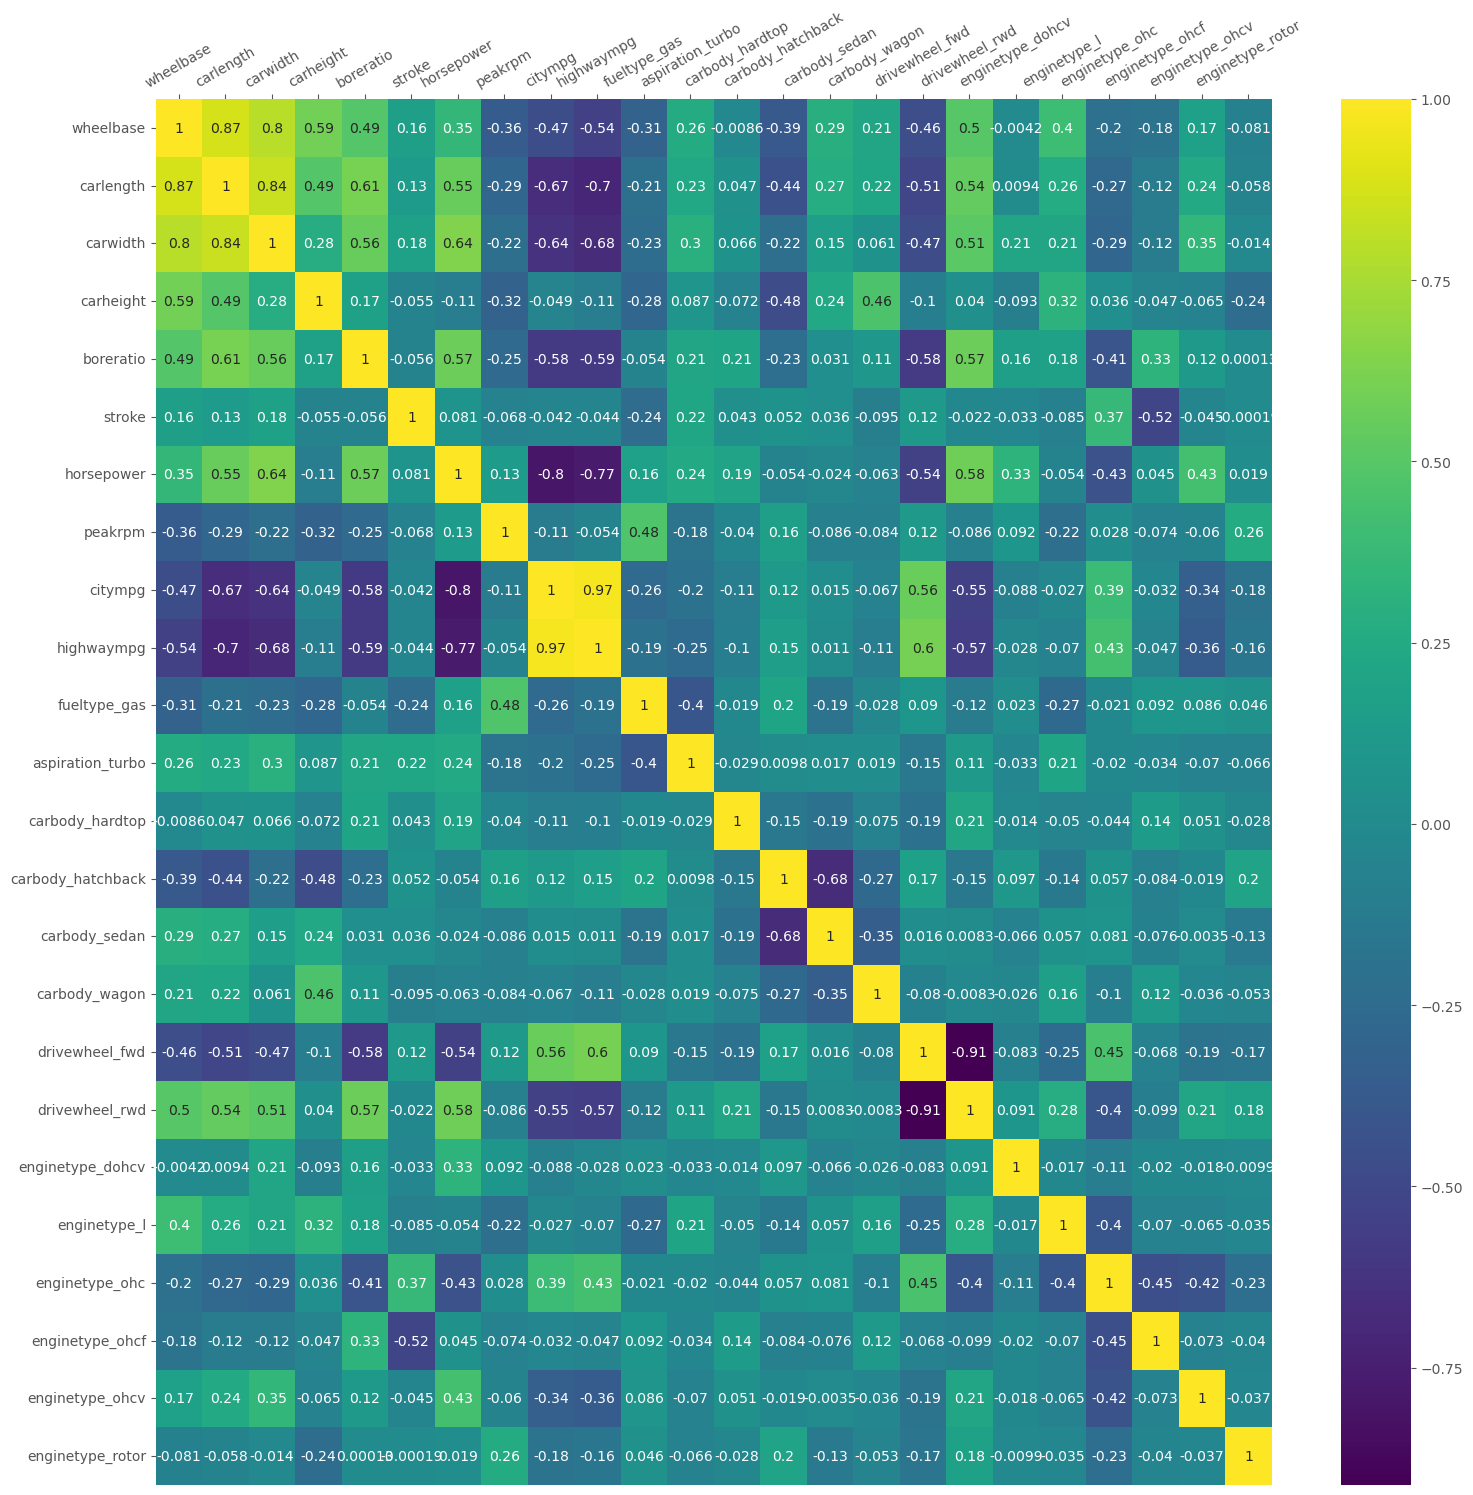

In [119]:
#Посмотрим еще раз как  оставшиеся признаки коррелируют между собой
X1 = cars__[['wheelbase', 'carlength', 'carwidth', 'carheight',
            'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor']]


corr_array = np.corrcoef(X1.values, rowvar=False)
corr_df = pd.DataFrame(corr_array, index=X1.columns, columns=X1.columns)

plt.figure(figsize=(18, 18))
ax = sns.heatmap(corr_df, annot=True, cmap='viridis')

ax.xaxis.set_label_position('top')  
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.show()

In [125]:
def get_high_corr_pairs(corr_df, threshold=0.7):
    # Создаем пустой список для хранения результатов
    high_corr_pairs = []

    # Проходим по верхнему треугольнику матрицы корреляций без диагонали
    for i in range(len(corr_df.columns)):
        for j in range(i+1, len(corr_df.columns)):
            corr_value = corr_df.iloc[i, j]
            if abs(corr_value) > threshold:
                pair = (corr_df.index[i], corr_df.columns[j], corr_value)
                high_corr_pairs.append(pair)

    result_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
    return result_df

# Используем функцию
high_corr = get_high_corr_pairs(corr_df, threshold=0.7)
print(high_corr)

        Feature 1       Feature 2  Correlation
0       wheelbase       carlength     0.874587
1       wheelbase        carwidth     0.795144
2       carlength        carwidth     0.841118
3       carlength      highwaympg    -0.704662
4      horsepower         citympg    -0.801456
5      horsepower      highwaympg    -0.770544
6         citympg      highwaympg     0.971337
7  drivewheel_fwd  drivewheel_rwd    -0.911996


Попробуем проанализировать эти высокие зависимости и уберем "интуитивно" дублирующие свое влияние признаки. А так же после уберем признаки с высоким VIF/ Достаточно ли это уменьшит Cond(мультиколлиарность)?

In [151]:
X2 = cars__[[ 'carheight',  'horsepower',
              'peakrpm', 'aspiration_turbo',  'drivewheel_fwd', ]]
X2['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data['feature'] = X2.columns
vif_data['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif_data)

            feature         VIF
0         carheight    1.142461
1        horsepower    1.637592
2           peakrpm    1.217861
3  aspiration_turbo    1.123173
4    drivewheel_fwd    1.532844
5         Intercept  868.939570


C:\Users\tsyto\AppData\Local\Temp\ipykernel_22756\8113713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['Intercept'] = 1


In [153]:
#Попробуем построить регрессионную модель price заново с выделенными выше признаками.
x = sm.add_constant(X2)
y = cars_['price']
print(sm.OLS(y,x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     111.3
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.07e-55
Time:                        00:19:40   Log-Likelihood:                -1995.7
No. Observations:                 205   AIC:                             4003.
Df Residuals:                     199   BIC:                             4023.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
carheight          494.6082    127.125  

Данный подход не дал желаемых результатов, а модель стала объяснять даже чуть меньше вариации цены. Стоит лучше продумать бизнес-логику и оставить только те признакки, которые действительно важны. А для наших полученных dummy-признаков(в первую очередь для них) использовать методы машинного обучения для понижения размерности из библиотеки sklearn:
 - Преобразование признаков: например, взять сумму, среднее или PCA для групп признаков, которые сильно коррелируют. - 
PCA (анализ главных компонент): позволяет создать новые, несвязанные компоненты, уменьшая мультиколлинеарность.